## wyjątki

Napisz program, który będzie kalkulatorem:
- program ma pobierać od użytkownika input: liczba operator liczba
- każdy znak w inpucie po spacji, np. 1 + 1
- pobrany input należy przerobić na listę i sprawdzić jej poprawność:
  - jeżeli w liście jest więcej niż 3 elementy - podnieś wyjątek IllegalFormulaError
  - IllegalFormulaError ma być własnym wyjątkiem stworzonym przez Ciebie
  - zamień liczby na typ float
  - jeśli liczby zmieniane na float zwrócą ValueError - przechwyć go i podnieć IllegalFormulaError i wyświetl komunikat "1 i 3 wartość muszą być liczbam"
  - jeśli użytkownik zamiast +, -, * lub / da inny operator, również zwróć IllegalFormulaError
- jeśli nie wystąpił żaden wyjątek wyświetl wynik
- pobieraj input od użytkownika tak długo jak użytkownik nie wpisze w inpucike polecenia KONIEC
- działania na operatorach zawrzyj w funkcji

In [2]:
class IllegalFormulaError(Exception):
    pass

def calculate(first_number, sign, second_number):
    try:
        first_number = float(first_number)
        second_number = float(second_number)
    except ValueError:
        raise IllegalFormulaError("Pierwsza i trzecia wartość muszą być liczbami")

    if sign not in ['+', '-', '*', '/']:
        raise IllegalFormulaError("Niepoprawny operator. Dozwolone operatory to +, -, *, /")

    if sign == '+':
        return first_number + second_number
    elif sign == '-':
        return first_number - second_number
    elif sign == '*':
        return first_number * second_number
    elif sign == '/':
        if second_number == 0:
            raise ZeroDivisionError("Nie można dzielić przez zero")
        return first_number / second_number

while True:
    user_input = input("Podaj działanie w formacie: liczba1 znak_działania liczba2 (lub wpisz KONIEC, aby zakończyć): ")
    
    if user_input.upper() == "KONIEC":
        break

    try:
        first_number, sign, second_number = user_input.split()
        result = calculate(first_number, sign, second_number)
        print("Wynik:", result)
    except ValueError:
        print("Nieprawidłowy format wprowadzenia. Poprawny format to liczba1 znak_działania liczba2")
    except ZeroDivisionError as e:
        print(e)
    except IllegalFormulaError as e:
        print(e)

Wynik: 3.0
Wynik: 40.0
Wynik: 2.0
Wynik: 5.0


## numpy

1. Korzystając z poniższego kodu oraz pliku `Zadanie_1.csv` utwórz tablicę zawierającą wzrost prezydentów USA.

In [9]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('Zadanie_1.csv', index_col=0)
df1.head()

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183


Korzystając z pakietu NumPy podaj:
- średni wzrost
- odchylenie standardowe
- najwyższy oraz najniższy wzrost:


In [19]:
data = np.array(df1['height(cm)'])
print(f"Średni wzrost: {np.mean(data)}")
print(f"Odchylenie std wzrostu: {np.std(data)}")
print(f"Najwyższy wzrost: {np.max(data)}")
print(f"Najniższy wzrost: {np.min(data)}")

Średni wzrost: 179.73809523809524
Odchylenie std wzrostu: 6.931843442745892
Najwyższy wzrost: 193
Najniższy wzrost: 163


Podaj również 25 i 75 kwantyl oraz medianę:

In [12]:
print(f"25 kwantyl wzrostu: {np.quantile(data, 0.25)}")
print(f"75 kwantyl wzrostu: {np.quantile(data, 0.75)}")

25 kwantyl wzrostu: 174.25
75 kwantyl wzrostu: 183.0


---
2. Wgraj dane z pliku `Zadanie_2.csv`.
- Znajdź wektory własne, oraz wartości własne dla zawartej w pliku macierzy
- Oblicz macierz odwrotną dla macierzy z pliku


In [17]:
matrix2 = np.loadtxt('Zadanie_2.csv', delimiter=';')

#wartości i wektory własne
eigenvalues, eigenvectors = np.linalg.eig(matrix2)

#macierz odwrotna
matrix2_inv = np.linalg.inv(matrix2)

---
3. Plik `Zadanie_3.csv` zawiera informacje o rocznych opadach w Seattle w 2014. Wykorzystaj kod poniżej aby wczytać plik.

In [24]:
rainfall = pd.read_csv('Zadanie_3.csv').PRCP.values

Możemy zwizualizować dane następującym kodem:

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.   ,  11.675,  23.35 ,  35.025,  46.7  ,  58.375,  70.05 ,
         81.725,  93.4  , 105.075, 116.75 , 128.425, 140.1  , 151.775,
        163.45 , 175.125, 186.8  , 198.475, 210.15 , 221.825, 233.5  ,
        245.175, 256.85 , 268.525, 280.2  , 291.875, 303.55 , 315.225,
        326.9  , 338.575, 350.25 , 361.925, 373.6  , 385.275, 396.95 ,
        408.625, 420.3  , 431.975, 443.65 , 455.325, 467.   ]),
 <BarContainer object of 40 artists>)

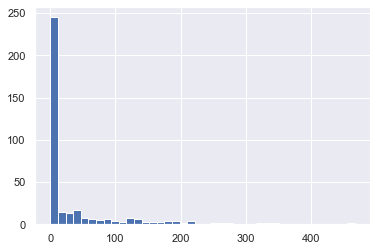

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(rainfall, 40)

Wykorzystując operatory logiczne znajdź dni, kiedy:
- Nie padało
- Padało
- Spadło powyżej 13 mm deszczu
- Spadło poniżej 5 mm deszczu, ale padało!

Do wyświetlenia wyników skorzystaj z:
```
print("Number days without rain:      ")
print("Number days with rain:         ")
print("Days with more than 13 mm:     ")
print("Rainy days with < 5 mm  :      ")
```


In [35]:
print(f"Number days without rain: {np.sum(rainfall == 0)}")
print(f"Number days with rain: {np.sum(rainfall > 0)}")
print(f"Days with more than 13 mm: {np.sum(rainfall > 13)}")
print(f"Rainy days with < 5 mm: {np.sum((rainfall > 0) & (rainfall < 5))}")

Number days without rain: 215
Number days with rain: 150
Days with more than 13 mm: 117
Rainy days with < 5 mm: 10


Korzystając z maskowania policz następujące statystyki:
- Medianę opadów w deszczowe dni w 2014 roku
- Medianę opadów latem w 2014 roku (czyli dni pomiędzy dniem 172 a 262)
- Maksymalne opady latem 2014 roku
- Maksymalne opady poza latem 2014 roku (czyli wiosna, jesień i zima)

Do wyświetlenia wyników skorzystaj z:
```
print("Median precip on rainy days in 2014 (inches):   ")
print("Median precip on summer days in 2014 (inches):  ")
print("Maximum precip on summer days in 2014 (inches): ")
print("Median precip on non-summer rainy days (inches):")
```




In [86]:
print(f"Median precip on rainy days in 2014 (inches): {np.median(rainfall[rainfall > 0])}")
print(f"Median precip on summer days in 2014 (inches): {np.median(rainfall[172:262])}")
print(f"Maximum precip on summer days in 2014 (inches): {np.max(rainfall[172:262])}")
print(f"Median precip on non-summer rainy days (inches): {np.median(np.concatenate((rainfall[:172][rainfall[:172] > 0], rainfall[262:][rainfall[262:] > 0])))}")

Median precip on rainy days in 2014 (inches): 49.5
Median precip on summer days in 2014 (inches): 0.0
Maximum precip on summer days in 2014 (inches): 216
Median precip on non-summer rainy days (inches): 51.0


---
4. Dane są dwa wektory A i B.
```
A = [0,3,2,5]
B = [0,3,1,4]
```

Wykonaj następujące operacje:
- przedstaw wektory jako tablice
- Dodaj A i B
- Odejmij B od A
- Pomnóż wektor A przez skalar a=4
- Oblicz iloczyn skalarny wektorów A i B
- Znajdź długość wektora B (w przestrzeni, nie chodzi o size!)

Te operacje można wykonać „ręcznie” w Pythonie, ale postaraj się znaleźć odpowiednie funkcje NumPy.


In [74]:
vec_a = np.array([0,3,2,5])
vec_b = np.array([0,3,1,4])

def dodawanie_vec(v1, v2):
    return np.add(v1, v2)
def odejmowanie_vec(v1, v2):
    return np.subtract(v1, v2)
def mnozenie_vec_przez_skalar(v, s):
    return  np.multiply(v, s)
def iloczyn_skalarny(v1, v2):
    return np.dot(v1, v2)
def dlugosc_vectora(v):
    return np.linalg.norm(v)

In [75]:
print(f"Dodawanie: {dodawanie_vec(vec_a, vec_b)}")
print(f"Odejmowanie: {odejmowanie_vec(vec_a, vec_b)}")
print(f"Mnozenie (przez 3): {mnozenie_vec_przez_skalar(vec_a, 3)}")
print(f"Iloczyn skalarny: {iloczyn_skalarny(vec_a, vec_b)}")
print(f"Długość wektora B: {dlugosc_vectora(vec_b)}")

Dodawanie: [0 6 3 9]
Odejmowanie: [0 0 1 1]
Mnozenie (przez 3): [ 0  9  6 15]
Iloczyn skalarny: 31
Długość wektora B: 5.0990195135927845
